<a href="https://colab.research.google.com/github/shreyasbhojane10/Artificial-Intelligence/blob/main/Binary_Classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Binary Classification using Keras

 Example of - Feedforward Neural Networks.
 In this classification problem we see If status BOOKED or NOT (booking_status for hotel rooms)

In [1]:
import pandas as pd

In [2]:
path = r"https://raw.githubusercontent.com/shreyasbhojane10/Datasets/refs/heads/main/booking_train.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [4]:
df['booking_status'].unique()     # output me [0, 1] means Binary Classification problem

array([0, 1])

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [6]:
df.shape

(42100, 19)

In [7]:
df.isna().sum()

,0
id,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [8]:
df.duplicated().sum()

np.int64(0)

## There are no missing values nor any duplicated in above data
#Separate X and Y features : Y : booking_status


In [9]:
X = df.drop(columns=["id","booking_status"])   # Id column not significant here | booking_status will use in Y
Y = df[["booking_status"]]

In [10]:
X.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [11]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


# Data Cleaning and Data Preprocessing

Even though the data doesnt contain any missing information, we are still going to handle missing data. Why?
In future, when data updations happen, there can be chances that we might
receive missing data.
Or, After model building when we are using it for final predictions, the predicted dataset might contain missing information.

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer    # SimpleImputer is used to handling missing values in datasets.
from sklearn.preprocessing import StandardScaler   # StandardScaler use for preprocessing, It scale data into same value for faster processing.

In [13]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"),
                         StandardScaler()).set_output(transform='pandas')

num_pipe                      # pipeline -> SimpleImputer -> StandardScaler ->(Output will come into array format) -> convert it into Dataframe using 'pandas'

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

# In a Jupyter environment, please re-run this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


#Split the data into training and testing

#Training and Testing

      80            20
      70            30
      60            40

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)

In [16]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
17408,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,-0.515173,0.630480,0.409661,0.143658,-1.001628,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,0.552579
24897,0.151040,-0.313454,0.130259,-0.278849,1.294624,-0.160945,-0.515173,0.063058,0.409661,0.143658,-0.776617,0.428551,-0.173408,-0.060506,-0.101479,0.068221,0.552579
18155,-1.753925,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,-1.281486,0.409661,-1.623525,0.123424,-1.149928,-0.173408,-0.060506,-0.101479,-0.755717,-0.737691
22920,-1.753925,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,-0.515173,-0.430353,0.409661,-0.563215,1.360982,0.428551,-0.173408,-0.060506,-0.101479,0.415567,-0.737691
18137,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,-0.541370,0.409661,-1.270088,1.023466,-1.149928,-0.173408,-0.060506,-0.101479,-0.796106,-0.737691


In [17]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
20351,0.151040,-0.313454,1.259332,-0.278849,-0.40702,-0.160945,-0.515173,-0.763405,-2.441040,1.203968,0.460940,-1.149928,-0.173408,-0.060506,-0.101479,-1.119219,-0.737691
21728,-1.753925,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,1.086885,0.409661,-0.563215,0.910961,-1.149928,-0.173408,-0.060506,-0.101479,0.684828,-0.737691
12697,0.151040,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,-0.775741,0.409661,0.850531,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.492610,0.552579
20136,2.056005,-0.313454,-0.998814,-0.979466,-0.40702,-0.160945,0.685890,-0.973105,0.409661,-0.209778,0.460940,0.428551,-0.173408,-0.060506,-0.101479,1.627240,1.842849
27760,-1.753925,-0.313454,-0.998814,-0.979466,-0.40702,-0.160945,-0.515173,-1.207475,0.409661,1.557404,-1.451649,-1.149928,-0.173408,-0.060506,-0.101479,-1.334628,-0.737691


In [18]:
ytrain.head()

,booking_status
17408,0
24897,0
18155,0
22920,1
18137,1


Model Building - # Feed Forward Neural Network with a Dropout Layer
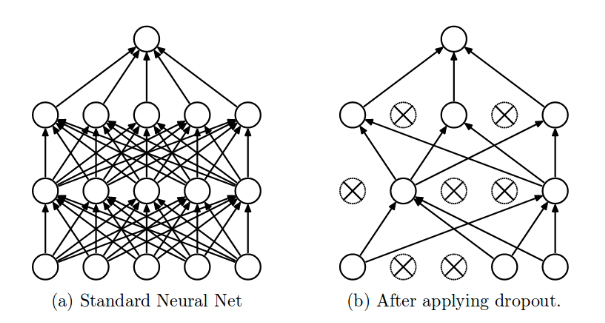

In [19]:
from keras.models import Sequential
from keras.layers import Input,Dropout,Dense

In [20]:
xtrain.shape

(33680, 17)

In [21]:
xtrain.shape[1]

17

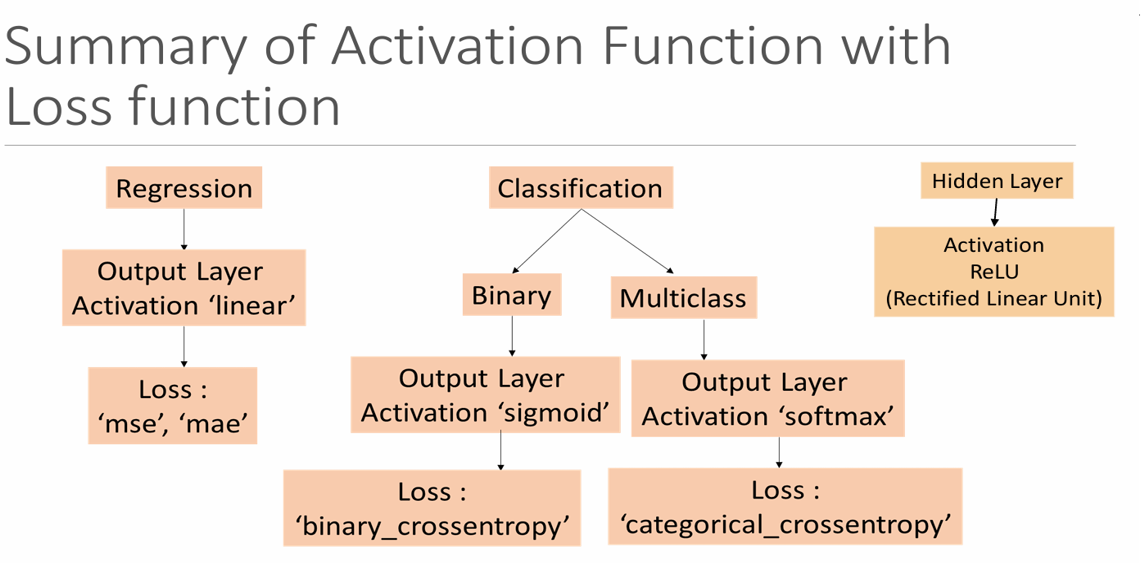

In [24]:
# Model Building
# Initalize the model
model = Sequential()

# Add the Input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Hidden layer1
model.add(Dense(units=64,activation="relu"))

# Add the Dropout layer1
model.add(Dropout(rate=0.3))

# Add the Hidden layer2
model.add(Dense(units=32,activation="relu"))

# Add the Dropout layer2
model.add(Dropout(rate=0.2))

# Add the Output layer
model.add(Dense(units=1,activation="sigmoid"))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [27]:
hist = model.fit(xtrain,ytrain,validation_split=0.25,epochs=100)

Epoch 1/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7092 - loss: 0.5546 - val_accuracy: 0.7777 - val_loss: 0.4644
Epoch 2/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7717 - loss: 0.4836 - val_accuracy: 0.7825 - val_loss: 0.4568
Epoch 3/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7792 - loss: 0.4698 - val_accuracy: 0.7852 - val_loss: 0.4546
Epoch 4/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7799 - loss: 0.4712 - val_accuracy: 0.7895 - val_loss: 0.4503
Epoch 5/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7832 - loss: 0.4679 - val_accuracy: 0.7929 - val_loss: 0.4492
Epoch 6/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7855 - loss: 0.4615 - val_accuracy: 0.7954 - val_loss: 0.4463
Epoch 7/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7900 - loss: 0.4570 - val_accuracy: 0.7968 - val_loss: 0.4466
Epoch 8/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7903 - loss: 0.4584 - val_accu

# Learning Curve

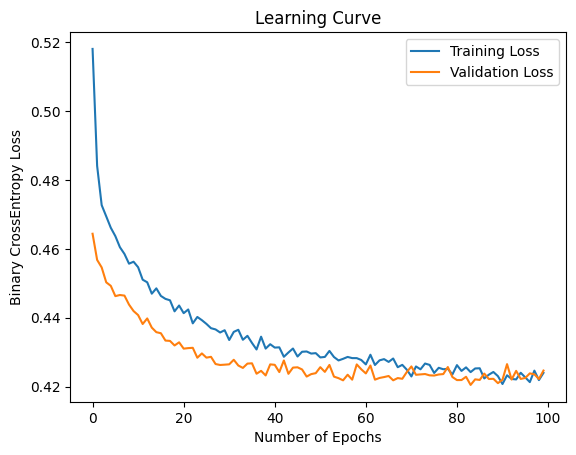

In [28]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label="Training Loss")
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Binary CrossEntropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [29]:
model.evaluate(xtrain,ytrain)

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8204 - loss: 0.4023


[0.40927132964134216, 0.8160629272460938]

In [30]:
model.evaluate(xtest,ytest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8049 - loss: 0.4357


[0.44296544790267944, 0.8016626834869385]

# The model accuracy for training and testing is >0.80 . We can consider this model for final model building

In [31]:
ypred_test = model.predict(xtest)
ypred_test

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.06266817],
       [0.6340901 ],
       [0.32105517],
       ...,
       [0.28044665],
       [0.7448693 ],
       [0.6965908 ]], dtype=float32)

In [32]:
ytest.head()

,booking_status
20351,0
21728,0
12697,1
20136,0
27760,0


In [33]:
ypred_test[:5]

array([[0.06266817],
       [0.6340901 ],
       [0.32105517],
       [0.06109394],
       [0.04041834]], dtype=float32)

In [34]:
# Set a threshold for predicted data
ypreds_final = [1 if i>=0.5 else 0 for i in ypred_test]
ypreds_final[:5]

[0, 1, 0, 0, 0]

In [35]:
ytest.head()

,booking_status
20351,0
21728,0
12697,1
20136,0
27760,0


In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypreds_final))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      5096
           1       0.77      0.71      0.74      3324

    accuracy                           0.80      8420
   macro avg       0.79      0.79      0.79      8420
weighted avg       0.80      0.80      0.80      8420



# Save the model

In [37]:
model.save("Booking Status Model.keras")

Predict the status of out of sample data

In [38]:
path2 = r"https://raw.githubusercontent.com/shreyasbhojane10/Datasets/refs/heads/main/booking_train_test.csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [39]:
xnew = xnew.drop(columns=["id"])
xnew.head()                             # x me bhi drop kiya tha

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [40]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [41]:
from keras.models import load_model
model_loaded = load_model('/content/Booking Status Model.keras')
model_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,532 (25.52 KB)

In [42]:
final_preds = model_loaded.predict(xnew_pre)
final_preds[:5]

878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.09415936],
       [0.06657237],
       [0.437133  ],
       [0.16913642],
       [0.6714975 ]], dtype=float32)

In [43]:
status_preds = [1 if i>=0.5 else 0 for i in final_preds]
status_preds[:5]

[0, 0, 0, 0, 1]

In [44]:
xnew["Booking_Status_Predicted"] = status_preds
xnew.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking_Status_Predicted
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2,0
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1,0
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0,1


In [45]:
xnew.to_csv("Predicted Results.csv",index=False)